# Figure generation for tilt and dispersion function graphs


In [1]:
# External modules.
import matplotlib.pyplot as plt
import numpy as np
import os

# Internal modules.
from setup.directories import img_path
from setup.results import my_ext
from setup.sunhuber import rho_d1
from setup.utils import makedir_safe

In [2]:
# Create directory to save figures.
makedir_safe(img_path)

## Illustration of $\phi$ and $\rho$

In [3]:
# Definitions.

def rho_linear(x):
    return x

def rho_tilted(x, gamma=1.0):
    return (np.exp(gamma*x)-1.0)/gamma

def rho_cvar(x, beta=0.5):
    return np.where(x>0.0, x, 0.0)/(1.0-beta)

def rho_quad(x):
    x_shift = x+1.0
    return np.where(x_shift>0.0, x_shift**2/2.0, 0.0)-0.5

def rhotilde_quad(x):
    return x**2/2.0

def rhotilde_sunhuber(x):
    return np.sqrt(x**2+1.0)-1.0

def rhotilde_abs(x):
    return np.absolute(x)

def rhotilde_lcosh(x):
    return np.log(np.cosh(x))


In [4]:
# Computation.

x_values = np.linspace(-1.5, 1.5, 100)

y_rho_linear = rho_linear(x=x_values)
y_rho_tilted = rho_tilted(x=x_values)
y_rho_cvar = rho_cvar(x=x_values)
y_rho_quad = rho_quad(x=x_values)
y_rho_list = [y_rho_linear, y_rho_tilted, y_rho_cvar]
y_rho_labels = ["Linear", r"Tilted ($\gamma = 1.0$)", r"CVaR ($\beta = 0.5$)"]
y_rho_colors = ["C0", "C1", "C2"]

y_rhotilde_quad = rhotilde_quad(x=x_values)
y_rhotilde_sunhuber = rhotilde_sunhuber(x=x_values)
y_rhotilde_abs = rhotilde_abs(x=x_values)
y_rhotilde_lcosh = rhotilde_lcosh(x=x_values)
y_rhotilde_list = [y_rhotilde_quad, y_rhotilde_sunhuber, y_rhotilde_abs]
y_rhotilde_labels = ["Quadratic", "Pseudo-Huber", "Absolute"]
y_rhotilde_colors = ["C4", "C5", "C6", "C7"]

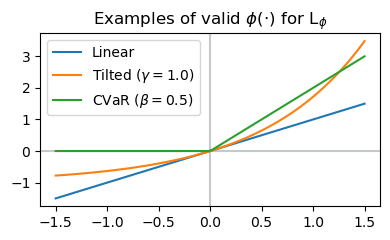

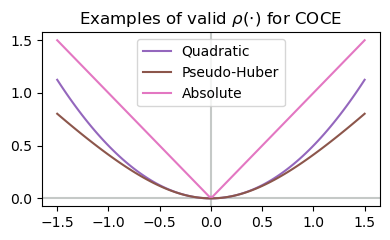

In [5]:
# Visualization.

fig, ax = plt.subplots(1, 1, figsize=(4,2.5))
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
for i in range(len(y_rho_list)):
    y_rho = y_rho_list[i]
    ax.plot(x_values, y_rho, linestyle="solid", label=y_rho_labels[i], color=y_rho_colors[i])
ax.set_title(r"Examples of valid $\phi(\cdot)$ for $\mathsf{L}_{\phi}$")
ax.legend(loc="best")
plt.tight_layout()
fname = os.path.join(img_path, "phi_graphs.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4,2.5))
ax.axhline(y=0.0, color="xkcd:silver")
ax.axvline(x=0.0, color="xkcd:silver")
for i in range(len(y_rhotilde_list)):
    y_rhotilde = y_rhotilde_list[i]
    ax.plot(x_values, y_rhotilde, linestyle="solid", label=y_rhotilde_labels[i], color=y_rhotilde_colors[i])
ax.set_title(r"Examples of valid $\rho(\cdot)$ for COCE")
ax.legend(loc="best")
plt.tight_layout()
fname = os.path.join(img_path, "rho_graphs.{}".format(my_ext))
plt.savefig(fname=fname)
plt.show()

___